Swiggy Restaurant Analysis Notebook


In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import squarify

In [17]:
df = pd.read_csv("swiggy.csv")

In [18]:
df.head(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Domlur,Bangalore,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Koramangala,Bangalore,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [19]:
df.describe

<bound method NDFrame.describe of           ID                    Area       City                Restaurant  \
0        211             Koramangala  Bangalore               Tandoor Hut   
1        221             Koramangala  Bangalore             Tunday Kababi   
2        246               Jogupalya  Bangalore                   Kim Lee   
3        248             Indiranagar  Bangalore         New Punjabi Hotel   
4        249             Indiranagar  Bangalore                       Nh8   
...      ...                     ...        ...                       ...   
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      Price  Avg ratings  Total ratings  

In [20]:
num_records = len(df)
num_records

8680

In [21]:
df.shape

(8680, 10)

In [22]:
price_range_counts = df['Price'].value_counts()
price_pie =px.pie(price_range_counts, names = price_range_counts.index, values= price_range_counts.values)
price_range_counts.head()


Price
300.0    1776
200.0    1774
250.0     968
400.0     838
500.0     605
Name: count, dtype: int64

Data Analysis

#Correlation between Restaurant Price and Average Rating

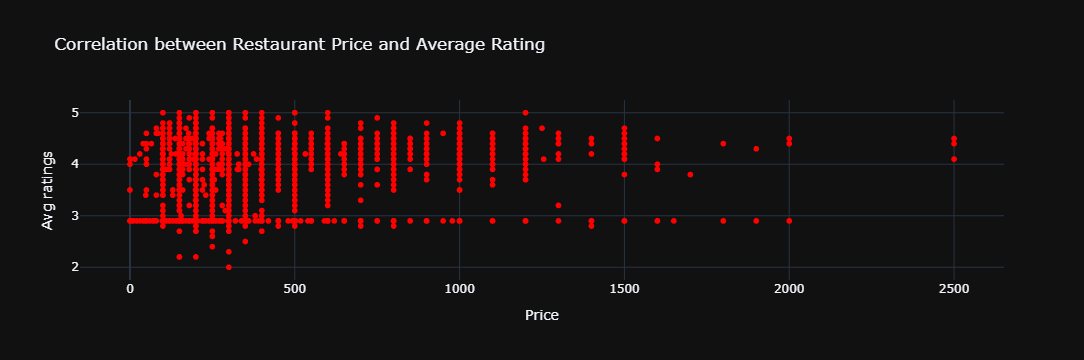

In [23]:
# Correlation between restaurant price and average rating
fig = px.scatter(df, x='Price', y='Avg ratings', title='Correlation between Restaurant Price and Average Rating', color_discrete_sequence=['red'])
fig.update_layout(template="plotly_dark")
fig.show()



#Most Popular Food Types in Top 10 Cities

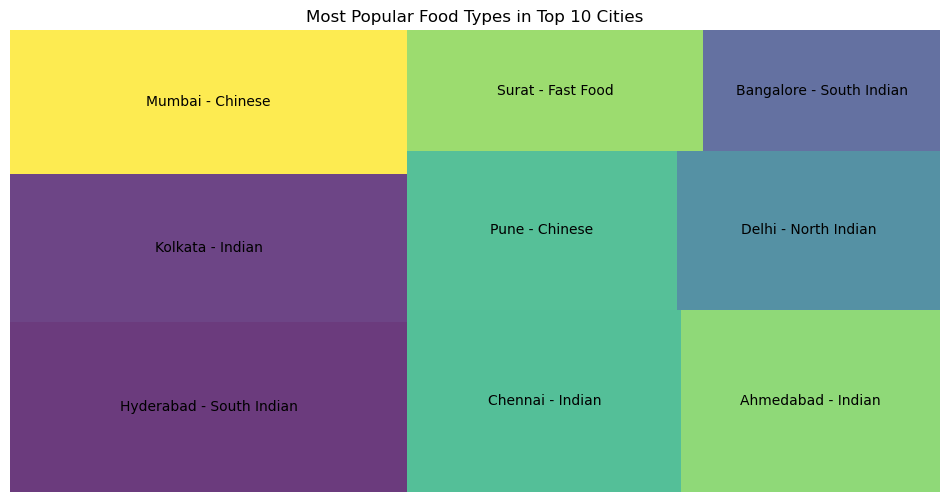

In [24]:
# Group by 'City' and 'Food type', then count occurrences
city_food_counts = df.groupby(['City', 'Food type']).size().reset_index(name='Count')

# Find the most popular food type in each city
popular_food_types = city_food_counts.loc[city_food_counts.groupby('City')['Count'].idxmax()]

# Get the top 10 cities with the most popular food types
top_10_cities = popular_food_types.nlargest(10, 'Count')

# Prepare the data for the treemap
labels = top_10_cities['City'] + ' - ' + top_10_cities['Food type']
sizes = top_10_cities['Count']

# Create the treemap
import matplotlib.pyplot as plt
import squarify

plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)

plt.axis('off')
plt.title('Most Popular Food Types in Top 10 Cities')
plt.show()

                                            

Top 10 Cities ordering food from Swiggy 

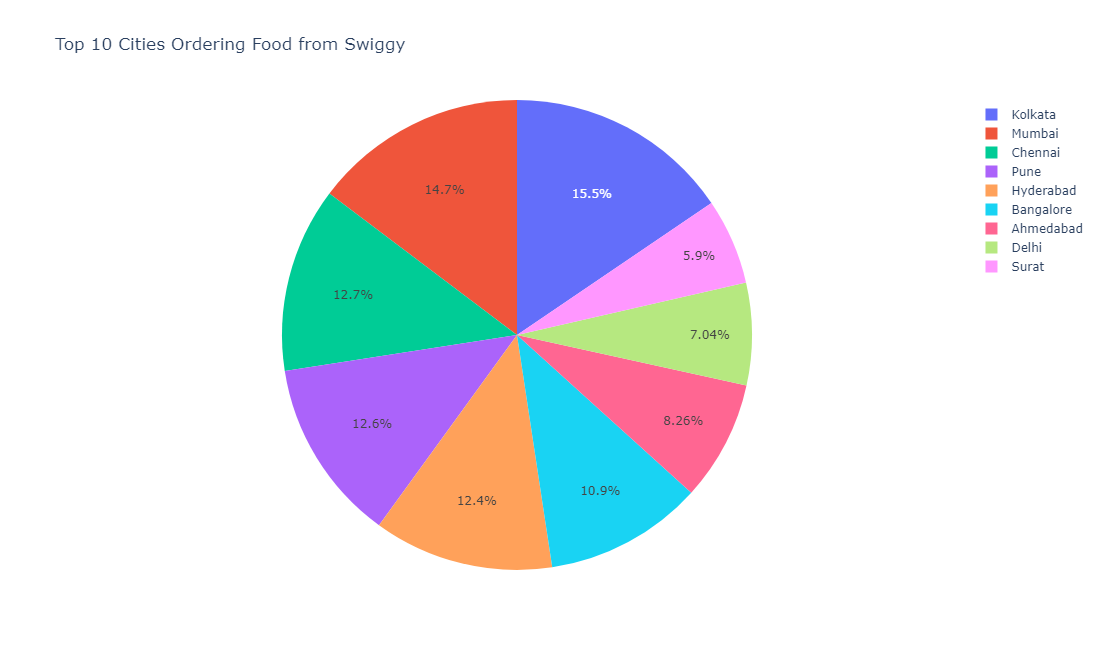

In [25]:
city_count = df["City"].value_counts()
top_n_cities = city_count.nlargest(10)
vis= px.pie(names=top_n_cities.index, values= top_n_cities.values, title = f'Top 10 Cities Ordering Food from Swiggy',labels={'City': 'City'}, width = 650, height= 650)
fig.update_layout(template="plotly_dark")
vis.show()

In [26]:
#Heat Map

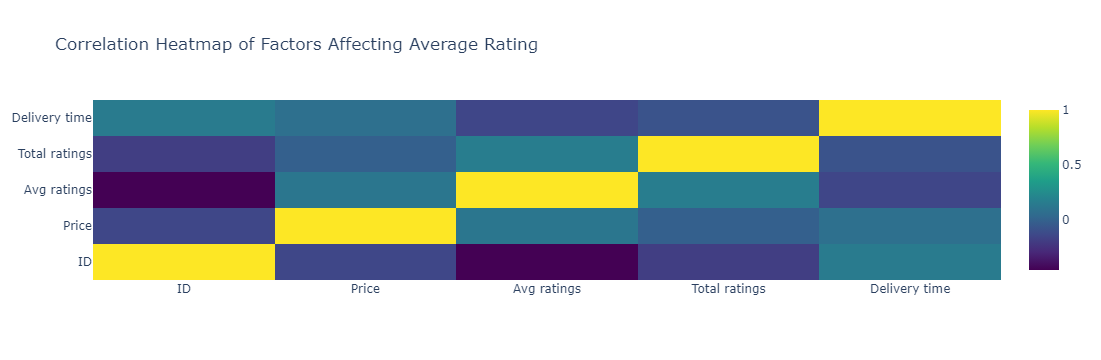

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
fig = go.Figure(data=go.Heatmap(z=correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns,colorscale='Viridis') )
fig.update_layout(title='Correlation Heatmap of Factors Affecting Average Rating')
fig.show()